In [64]:
%load_ext autoreload

%autoreload 2

from countrycrab import solver
import os
import matplotlib.pyplot as plt
import numpy as np
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3,4,5,6,7"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Example 1: pass to the solver just the instance path

In [77]:
module_path = os.path.abspath(os.path.join(".."))
config = {'instance': module_path +'/data/datasets/uf50-218/uf50-01.cnf', 
          'heuristic': 'walksat_g',
            'compiler':'compile_walksat_g',
            'noise':2.08}
params = {'max_runs':200,
         'noise_distribution':'normal'}

In [78]:
%%time
p_vs_t_g_sc, violated_constr_mat, inputs = solver.solve(config = config,params = params)

CPU times: user 4.25 s, sys: 0 ns, total: 4.25 s
Wall time: 4.25 s


In [79]:
module_path = os.path.abspath(os.path.join(".."))
config = {'instance': module_path +'/data/datasets/uf50-218/uf50-01.cnf',
          'netlist_dir': module_path +'/data/vpr_netlist/',
          'heuristic': 'walksat_g',
         'compiler':'compile_walksat_g',
          'num_wta_inputs':17,
         'noise': 0.82}
params = {'max_runs':200,
          'scheduling':'vpr',
         'noise_distribution':'bernoulli'}

In [80]:
%%time
p_vs_t_g_mc1, violated_constr_mat, inputs = solver.solve(config = config,params = params)

CPU times: user 14.7 s, sys: 0 ns, total: 14.7 s
Wall time: 14.7 s


In [61]:
module_path = os.path.abspath(os.path.join(".."))
config = {'instance': module_path +'/data/datasets/uf50-218/uf50-01.cnf',     
          'netlist_dir': module_path +'/data/vpr_netlist/',
          'heuristic': 'walksat_g',
         'compiler':'compile_walksat_g',
          'num_wta_inputs':17,
         'noise': 0.82}
params = {'max_runs':200,
          'scheduling':'fill_first',
         'noise_distribution':'normal'}

In [62]:
%%time
p_vs_t_g_mc2, violated_constr_mat, inputs = solver.solve(config = config,params = params)

CPU times: user 5.6 s, sys: 0 ns, total: 5.6 s
Wall time: 5.6 s


Text(0, 0.5, 'Solution probability')

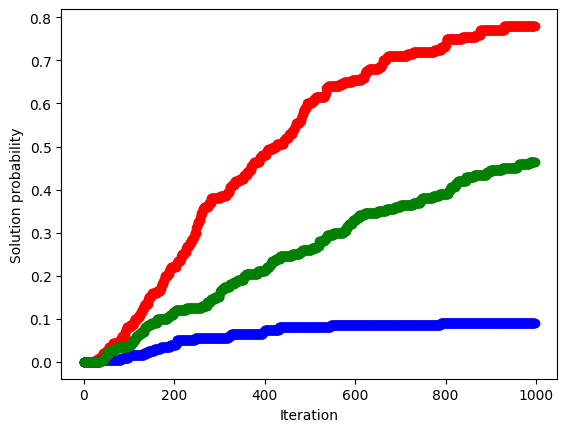

In [69]:
plt.plot(p_vs_t_g_sc[0:-1],'or')
plt.plot(p_vs_t_g_mc1[0:-1],'ob')
plt.plot(p_vs_t_g_mc2[0:-1],'og')
plt.xlabel('Iteration')
plt.ylabel('Solution probability')

Text(0, 0.5, 'Number of violated clauses')

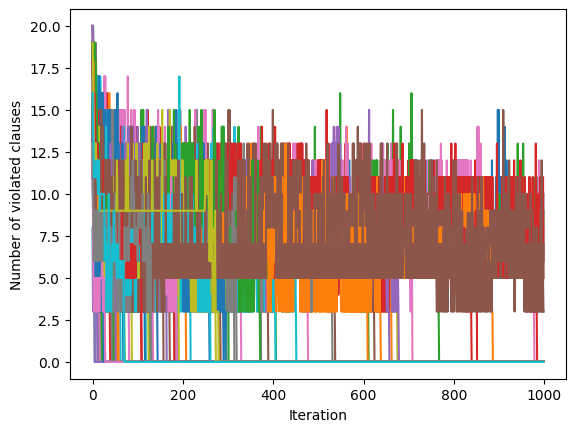

In [55]:
for run in violated_constr_mat:
    plt.plot(run)
plt.xlabel('Iteration')
plt.ylabel('Number of violated clauses')

### Example 2: specify number of experiments and noise value

In [59]:
module_path = os.path.abspath(os.path.join(""))
config = {'instance': module_path +'/data/uf20-91/uf20-01.cnf',
         'noise': 0.8}
params = {'max_runs': 250,  #number of of parallel runs
         'max_flips': 500} #number of flips in a single run

In [60]:
p_vs_t, violated_constr_mat, inputs = solver.solve(config = config,params = params)

Text(0, 0.5, 'Solution probability')

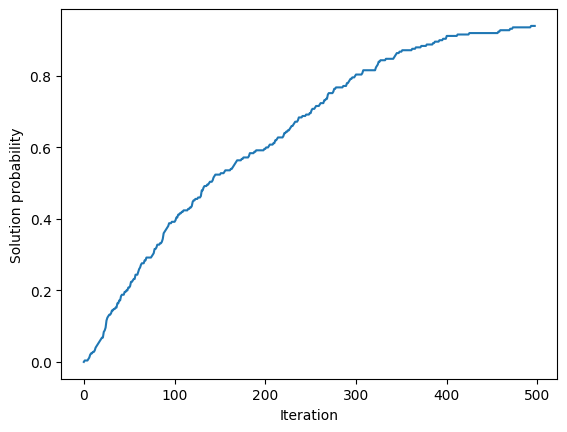

In [61]:
plt.plot(p_vs_t[0:-1])
plt.xlabel('Iteration')
plt.ylabel('Solution probability')